<h1 style="text-align: center;"> <strong> <i> Predicción de Cáncer de Pulmón con Machine Learning </i> </strong> </h1>

# Descripción del Dataset

Este conjunto de datos contiene información a nivel de paciente, destinada al análisis y predicción del riesgo de cáncer de pulmón utilizando una amplia gama de variables demográficas, de estilo de vida, ambientales y clínicas.  

Las características reflejan factores médicos y de salud pública bien establecidos que se sabe influyen en los resultados del cáncer de pulmón, con especial énfasis en el comportamiento de consumo de tabaco, la exposición prolongada y la salud respiratoria.  

El dataset integra características individuales como edad, género, nivel educativo e ingresos, junto con un historial detallado de consumo de tabaco, exposiciones ambientales, condiciones respiratorias previas, mediciones clínicas y hábitos de estilo de vida. En conjunto, estas variables modelan cómo múltiples dimensiones de riesgo interactúan para afectar el riesgo de cáncer de pulmón.  

La variable objetivo, **lung_cancer_risk**, indica si un individuo está clasificado como en riesgo elevado de cáncer de pulmón en función de factores de riesgo combinados.  

Este conjunto de datos es especialmente adecuado para:
- Modelado de clasificación  
- Estratificación de riesgo  
- Análisis de importancia de características  
- Aplicaciones de IA explicable en analítica de salud

<h3> <strong> <i> Dataset Origin Link: </i> </strong> </h3>
<a href="https://www.kaggle.com/datasets/dhrubangtalukdar/lung-cancer-prediction-dataset">Kaggle - Lung Cancer Prediction Dataset  </a>

# 1- Leer y analizar dataset

In [1]:
import pandas as pd

In [58]:
URL = './dataset/lung_cancer.csv'
df = pd.read_csv(URL)

## 1.1- Estructura del dataframe

In [3]:
# Estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      5000 non-null   int64
 1   gender                   5000 non-null   int64
 2   education_years          5000 non-null   int64
 3   income_level             5000 non-null   int64
 4   smoker                   5000 non-null   int64
 5   smoking_years            5000 non-null   int64
 6   cigarettes_per_day       5000 non-null   int64
 7   pack_years               5000 non-null   int64
 8   passive_smoking          5000 non-null   int64
 9   air_pollution_index      5000 non-null   int64
 10  occupational_exposure    5000 non-null   int64
 11  radon_exposure           5000 non-null   int64
 12  family_history_cancer    5000 non-null   int64
 13  copd                     5000 non-null   int64
 14  asthma                   5000 non-null   int64
 15  prev

In [4]:
# Columnas y valores nulos
print('Columnas:',df.columns)

print('\nValores nulos:\n', df.isna().sum())

Columnas: Index(['age', 'gender', 'education_years', 'income_level', 'smoker',
       'smoking_years', 'cigarettes_per_day', 'pack_years', 'passive_smoking',
       'air_pollution_index', 'occupational_exposure', 'radon_exposure',
       'family_history_cancer', 'copd', 'asthma', 'previous_tb',
       'chronic_cough', 'chest_pain', 'shortness_of_breath', 'fatigue', 'bmi',
       'oxygen_saturation', 'fev1_x10', 'crp_level', 'xray_abnormal',
       'exercise_hours_per_week', 'diet_quality', 'alcohol_units_per_week',
       'healthcare_access', 'lung_cancer_risk'],
      dtype='object')

Valores nulos:
 age                        0
gender                     0
education_years            0
income_level               0
smoker                     0
smoking_years              0
cigarettes_per_day         0
pack_years                 0
passive_smoking            0
air_pollution_index        0
occupational_exposure      0
radon_exposure             0
family_history_cancer      0
copd          

In [60]:
# Correlaciones (target: lung_cancer_risk)
corr = df.corr()['lung_cancer_risk'].sort_values(ascending=False)

strong_corr = corr[abs(corr) > 0.5]

print(strong_corr)

print(type(strong_corr))

lung_cancer_risk       1.000000
pack_years             0.830688
crp_level              0.780422
cigarettes_per_day     0.751001
xray_abnormal          0.748023
smoking_years          0.721593
shortness_of_breath    0.659022
smoker                 0.630108
chronic_cough          0.629583
copd                   0.616377
oxygen_saturation     -0.766323
fev1_x10              -0.787038
Name: lung_cancer_risk, dtype: float64
<class 'pandas.core.series.Series'>


## 1.2- Representación gráfica de correlaciones

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\802329895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")


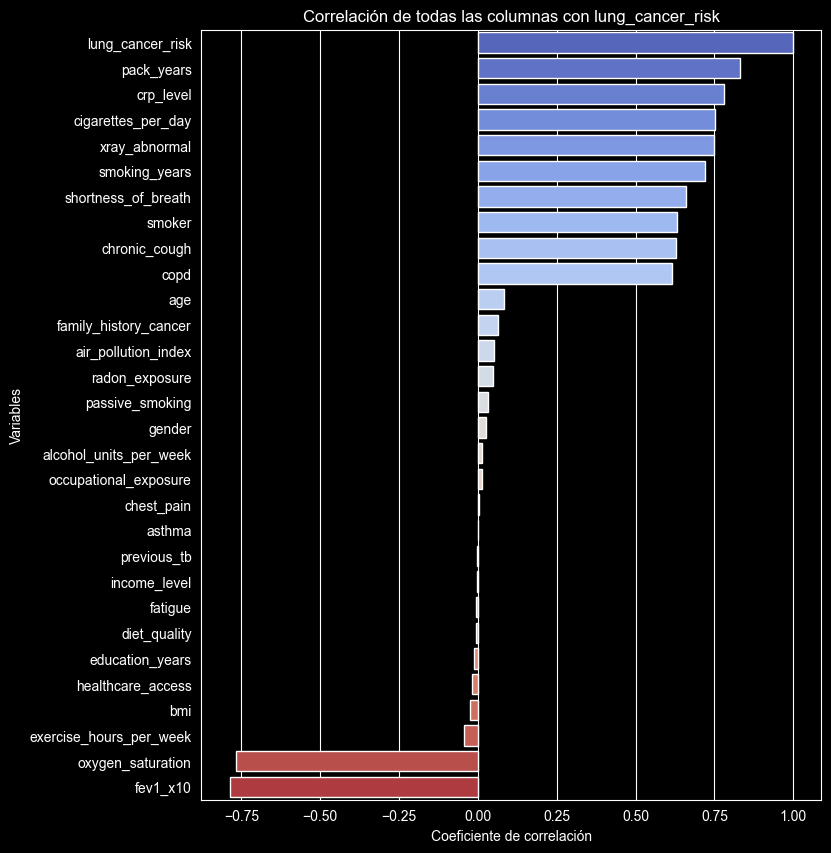

In [66]:
corr_target = df.corr()["lung_cancer_risk"].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Correlación de todas las columnas con lung_cancer_risk")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\1455038692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_corr.values, y=strong_corr.index, palette="coolwarm")


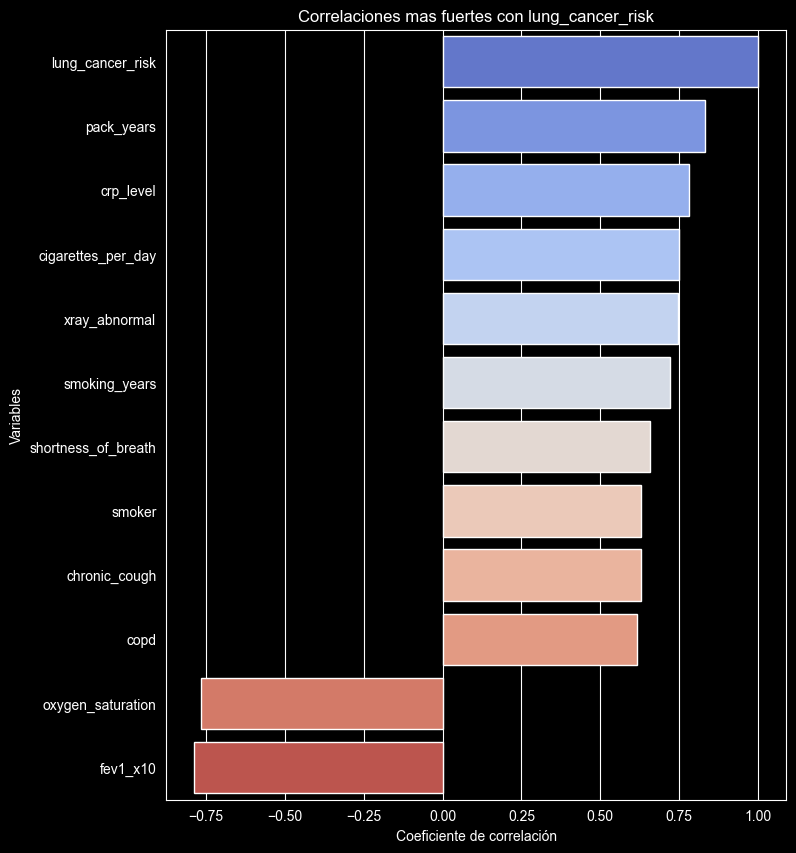

In [67]:
plt.figure(figsize=(8, 10))
sns.barplot(x=strong_corr.values, y=strong_corr.index, palette="coolwarm")
plt.title("Correlaciones mas fuertes con lung_cancer_risk")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.show()

## 1.3- Tirar etiquetas con correlacion debil

In [68]:
df = df[strong_corr.keys()]

df

,lung_cancer_risk,pack_years,crp_level,cigarettes_per_day,xray_abnormal,smoking_years,shortness_of_breath,smoker,chronic_cough,copd,oxygen_saturation,fev1_x10
0,1,12,6,15,1,16,1,1,1,0,94,29
1,0,0,4,0,0,0,0,0,0,0,96,35
2,1,13,9,29,1,9,1,1,0,0,95,29
3,0,0,0,0,0,0,0,0,0,0,96,32
4,0,0,8,0,0,0,0,0,0,0,97,36
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,100,33
4996,0,0,3,0,0,33,0,1,0,0,98,35
4997,0,3,5,6,0,10,0,1,0,0,97,32
4998,1,21,10,15,1,28,0,1,1,1,90,22


In [69]:
# Verificar desbalanceo del target
print(df['lung_cancer_risk'].value_counts())
print(df['lung_cancer_risk'].value_counts(normalize=True))

lung_cancer_risk
0    3756
1    1244
Name: count, dtype: int64
lung_cancer_risk
0    0.7512
1    0.2488
Name: proportion, dtype: float64


# 2- Construccion del modelo

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

## 2.1- Auxiliares 

In [9]:
# Auxiliar para dividir conjunto de datos
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [45]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

In [11]:
# Transormador para codificar únicamente las columnas categoricas y devolver un df
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        self._oh = OneHotEncoder()
        self._columns = None

    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh.toarray(),
                                columns=self._columns,
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

In [46]:
# Transofrmador que prepara todo el conjunto de datos llamando pipelines y transformadores personalizados
class DataFramePreparer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self._full_pipeline = None
        self._columns = None

    def fit(self, X, y=None):
        num_attribs = list(X.select_dtypes(exclude=['object']))
        cat_attribs = list(X.select_dtypes(include=['object']))
        self._full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", CustomOneHotEncoder(), cat_attribs),
        ])
        self._full_pipeline.fit(X)
        self._columns = pd.get_dummies(X).columns
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_prep = self._full_pipeline.transform(X_copy)
        return pd.DataFrame(X_prep,
                            columns=self._columns,
                            index=X_copy.index)

## 2.2- Dividir conjunto de datos

In [47]:
train_set, val_set, test_set = train_val_test_split(
    df, rstate=42, shuffle=True, stratify="lung_cancer_risk"
)

In [48]:
X_train = train_set.drop("lung_cancer_risk", axis=1)
y_train = train_set["lung_cancer_risk"]

X_val = val_set.drop("lung_cancer_risk", axis=1)
y_val = val_set["lung_cancer_risk"]

X_test = test_set.drop("lung_cancer_risk", axis=1)
y_test = test_set["lung_cancer_risk"]

## 2.3- Entrenar modelo de regresion logistica

In [49]:
# Pipeline principal
pipe = Pipeline([
    ("prep", DataFramePreparer()),
    ("clf", LogisticRegression(
        solver="lbfgs",
        max_iter=1000,
        class_weight="balanced",
        C=1.0
    ))
])

In [50]:
# Entrenamiento
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool,

## 2.4- Metricas del modelo

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [53]:
y_val_pred = pipe.predict(X_val)
y_val_proba = pipe.predict_proba(X_val)[:,1]

print("Validation Report:\n", classification_report(y_val, y_val_pred))
print("Validation ROC-AUC:", roc_auc_score(y_val, y_val_proba))

# --- 5. Test final ---
y_test_pred = pipe.predict(X_test)
y_test_proba = pipe.predict_proba(X_test)[:,1]

print("Test Report:\n", classification_report(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))

# Extraer nombres de columnas procesadas
prep = pipe.named_steps["prep"]
columns = prep._columns

# Coeficientes del modelo
coef = pipe.named_steps["clf"].coef_[0]

coef_df = pd.DataFrame({
    "feature": columns,
    "coef": coef
}).sort_values(by="coef", ascending=False)

print("\nCoeficientes ordenados:\n", coef_df.head(15))

Validation Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       751
           1       0.81      0.94      0.87       249

    accuracy                           0.93      1000
   macro avg       0.89      0.93      0.91      1000
weighted avg       0.94      0.93      0.93      1000

Validation ROC-AUC: 0.989026679287055
Test Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       751
           1       0.84      0.95      0.89       249

    accuracy                           0.94      1000
   macro avg       0.91      0.95      0.93      1000
weighted avg       0.95      0.94      0.95      1000

Test ROC-AUC: 0.9929037053674084

Coeficientes ordenados:
                 feature      coef
3         xray_abnormal  2.005140
0            pack_years  1.390037
1             crp_level  1.341767
7         chronic_cough  1.291292
8                  copd  1.281823
4         s

## 2.5- Representacion grafica de las metricas del modelo

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\3762039069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Dataset", y="ROC-AUC", palette="viridis")


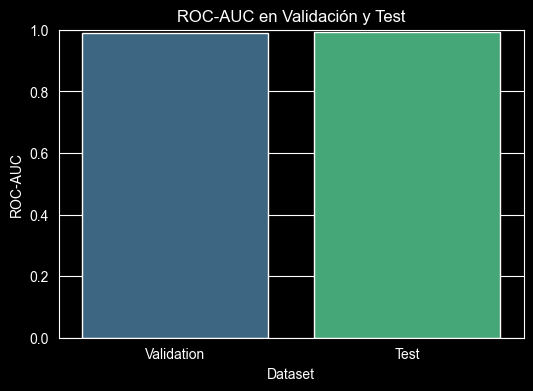

In [54]:
val_auc = roc_auc_score(y_val, y_val_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

metrics_df = pd.DataFrame({
    "Dataset": ["Validation", "Test"],
    "ROC-AUC": [val_auc, test_auc]
})

plt.figure(figsize=(6,4))
sns.barplot(data=metrics_df, x="Dataset", y="ROC-AUC", palette="viridis")
plt.title("ROC-AUC en Validación y Test")
plt.ylim(0,1)
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\2576083583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_top, x="coef", y="feature", palette="coolwarm")


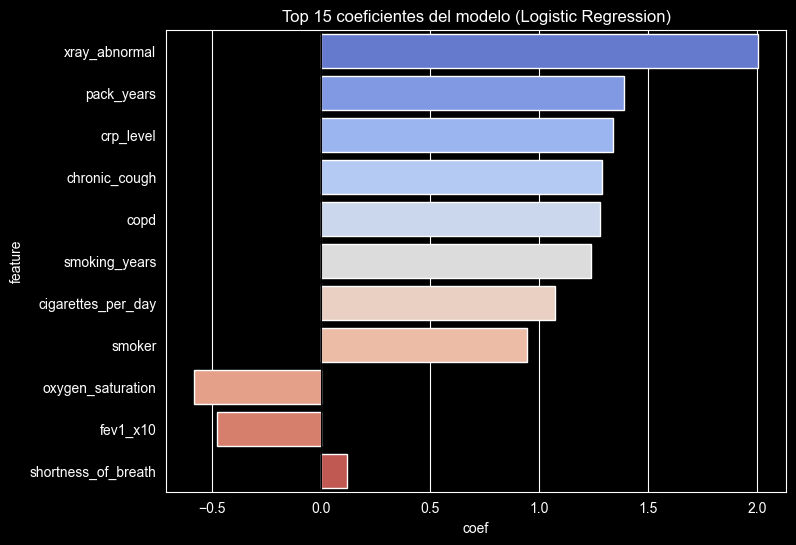

In [71]:
coef_top = coef_df.reindex(coef_df.coef.abs().sort_values(ascending=False).index).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=coef_top, x="coef", y="feature", palette="coolwarm")
plt.title("Top 15 coeficientes del modelo (Logistic Regression)")
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

# 3- Prediccion de  nuevas entradas

## 3.1- Entradas simuladas

In [87]:
# primer conjunto de nuevas entradas
pacientes = [
    { # paciente fumador cronico con sintomas respiratorios
        "bp_level": 8,
        "cigarettes_per_day": 30,
        "smoking_years": 35,
        "pack_years": 40,
        "xray_abnormal": 1,
        "shortness_of_breath": 1,
        "smoker": 1,
        "crp_level": 25,
        "chronic_cough": 1,
        "copd": 1,
        "oxygen_saturation": 88,
        "fev1_x10": 6
    },
    { # paciente joven no fumador sin sintomas
        "bp_level": 3,
        "cigarettes_per_day": 0,
        "smoking_years": 0,
        "pack_years": 0,
        "xray_abnormal": 0,
        "shortness_of_breath": 0,
        "smoker": 0,
        "crp_level": 2,
        "chronic_cough": 0,
        "copd": 0,
        "oxygen_saturation": 98,
        "fev1_x10": 10
    },
    { # fumador moderado con radiografia normal pero sintomas leves
        "bp_level": 5,
        "cigarettes_per_day": 10,
        "smoking_years": 15,
        "pack_years": 12,
        "xray_abnormal": 0,
        "shortness_of_breath": 1,
        "smoker": 1,
        "crp_level": 12,
        "chronic_cough": 1,
        "copd": 0,
        "oxygen_saturation": 94,
        "fev1_x10": 8
    },
    { # exfumador con radiografia anormal pero sin sintomas
        "bp_level": 6,
        "cigarettes_per_day": 0,
        "smoking_years": 20,
        "pack_years": 25,
        "xray_abnormal": 1,
        "shortness_of_breath": 0,
        "smoker": 0,
        "crp_level": 15,
        "chronic_cough": 0,
        "copd": 1,
        "oxygen_saturation": 92,
        "fev1_x10": 7
    },
    { # fumador reciente sin sintomas ni anomalias
        "bp_level": 4,
        "cigarettes_per_day": 5,
        "smoking_years": 2,
        "pack_years": 1,
        "xray_abnormal": 0,
        "shortness_of_breath": 0,
        "smoker": 1,
        "crp_level": 5,
        "chronic_cough": 0,
        "copd": 0,
        "oxygen_saturation": 97,
        "fev1_x10": 9
    }
]

In [93]:
# segundo conjunto de nuevas entradas
pacientes2 = [
    { # paciente con EPOC, fumador intenso, función pulmonar baja
        "bp_level": 7,
        "cigarettes_per_day": 25,
        "smoking_years": 30,
        "pack_years": 35,
        "xray_abnormal": 1,
        "shortness_of_breath": 1,
        "smoker": 1,
        "crp_level": 22,
        "chronic_cough": 1,
        "copd": 1,
        "oxygen_saturation": 89,
        "fev1_x10": 6
    },
    { # paciente sano, no fumador, sin síntomas
        "bp_level": 2,
        "cigarettes_per_day": 0,
        "smoking_years": 0,
        "pack_years": 0,
        "xray_abnormal": 0,
        "shortness_of_breath": 0,
        "smoker": 0,
        "crp_level": 1,
        "chronic_cough": 0,
        "copd": 0,
        "oxygen_saturation": 99,
        "fev1_x10": 10
    },
    { # fumador leve con tos crónica y saturación borderline
        "bp_level": 5,
        "cigarettes_per_day": 8,
        "smoking_years": 10,
        "pack_years": 7,
        "xray_abnormal": 0,
        "shortness_of_breath": 0,
        "smoker": 1,
        "crp_level": 10,
        "chronic_cough": 1,
        "copd": 0,
        "oxygen_saturation": 93,
        "fev1_x10": 8
    },
    { # exfumador con radiografía anormal y función pulmonar reducida
        "bp_level": 6,
        "cigarettes_per_day": 0,
        "smoking_years": 25,
        "pack_years": 30,
        "xray_abnormal": 1,
        "shortness_of_breath": 1,
        "smoker": 0,
        "crp_level": 18,
        "chronic_cough": 1,
        "copd": 1,
        "oxygen_saturation": 90,
        "fev1_x10": 7
    },
    { # fumador reciente con radiografía normal y buena función pulmonar
        "bp_level": 4,
        "cigarettes_per_day": 5,
        "smoking_years": 3,
        "pack_years": 2,
        "xray_abnormal": 0,
        "shortness_of_breath": 0,
        "smoker": 1,
        "crp_level": 4,
        "chronic_cough": 0,
        "copd": 0,
        "oxygen_saturation": 96,
        "fev1_x10": 9
    },
    { # paciente con síntomas respiratorios pero sin historial de tabaquismo
        "bp_level": 5,
        "cigarettes_per_day": 0,
        "smoking_years": 0,
        "pack_years": 0,
        "xray_abnormal": 1,
        "shortness_of_breath": 1,
        "smoker": 0,
        "crp_level": 14,
        "chronic_cough": 1,
        "copd": 0,
        "oxygen_saturation": 91,
        "fev1_x10": 8
    },
    { # fumador moderado con EPOC y saturación baja
        "bp_level": 6,
        "cigarettes_per_day": 15,
        "smoking_years": 20,
        "pack_years": 20,
        "xray_abnormal": 1,
        "shortness_of_breath": 1,
        "smoker": 1,
        "crp_level": 20,
        "chronic_cough": 1,
        "copd": 1,
        "oxygen_saturation": 87,
        "fev1_x10": 6
    }
]

In [88]:
# primer conjunto de nuevas entradas
X_new = pd.DataFrame(pacientes)

# los pacientes 1,3,4 son de riesgo (1), y los otros no (0)
y_true = [1, 0, 1, 1, 0]

In [94]:
# segundo conjunto de nuevas entradas
X_new2 = pd.DataFrame(pacientes2)

# - pacientes 1, 4, 6 y 7 tienen factores de riesgo altos
y_true2 = [1, 0, 0, 1, 0, 1, 1]

## 3.2- Predicciones del modelo

In [89]:
y_pred = pipe.predict(X_new)
y_proba = pipe.predict_proba(X_new)[:, 1]

In [95]:
y_pred2 = pipe.predict(X_new2)
y_proba2 = pipe.predict_proba(X_new2)[:, 1]

## 3.3- Evaluacion del modelo (primer conjunto de nuevas entradas)

In [90]:
# metricas
print("Classification Report:\n", classification_report(y_true, y_pred))
print("ROC-AUC:", roc_auc_score(y_true, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

ROC-AUC: 1.0


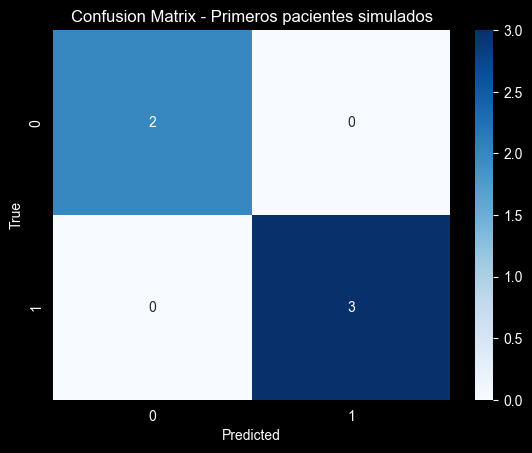

In [104]:
# matriz de confucion (grafica)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Primeros pacientes simulados")
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\298079853.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette="crest")


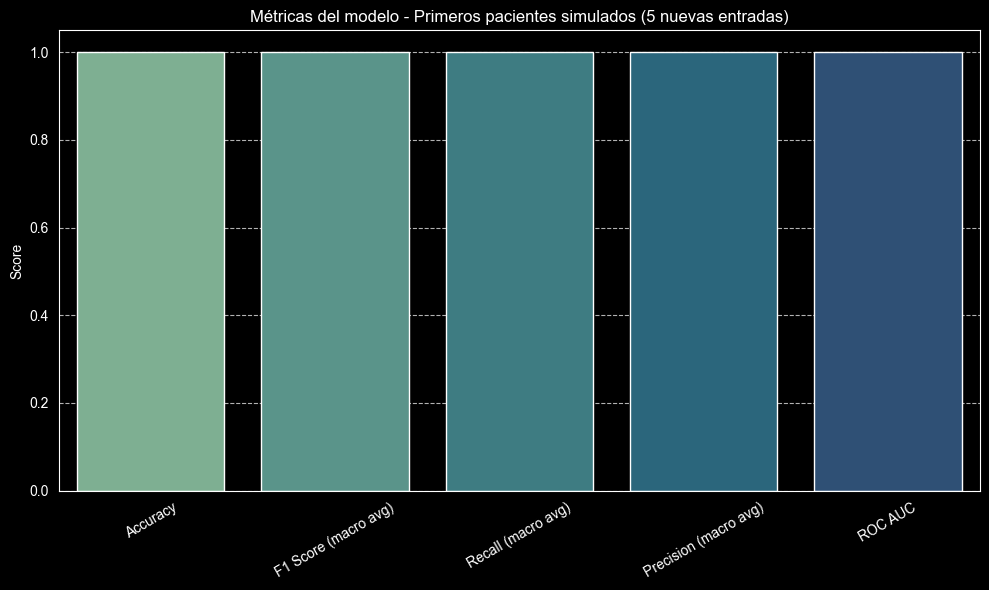

In [101]:
# Métricas detalladas del reporte
metrics = {
    'Accuracy': 1.00,
    'F1 Score (macro avg)': 1.00,
    'Recall (macro avg)': 1.00,
    'Precision (macro avg)': 1.00,
    'ROC AUC': 1.00
}

# Convertir a listas para graficar
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10,6))
sns.barplot(x=names, y=values, palette="crest")
plt.ylim(0,1.05)
plt.title("Métricas del modelo - Primeros pacientes simulados (5 nuevas entradas)")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## 3.4- Evaluacion del modelo (segundo conjunto de nuevas entradas)

In [96]:
# metricas
print("Classification Report:\n", classification_report(y_true2, y_pred2))
print("ROC-AUC:", roc_auc_score(y_true2, y_proba2))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

ROC-AUC: 1.0


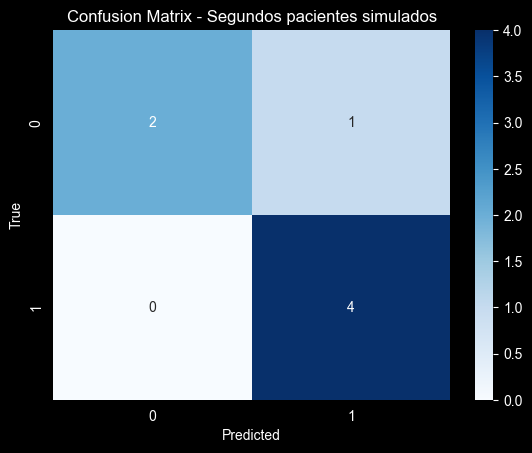

In [103]:
# matriz de confucion (grafica)
cm = confusion_matrix(y_true2, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Segundos pacientes simulados")
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\1641820584.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette="crest")


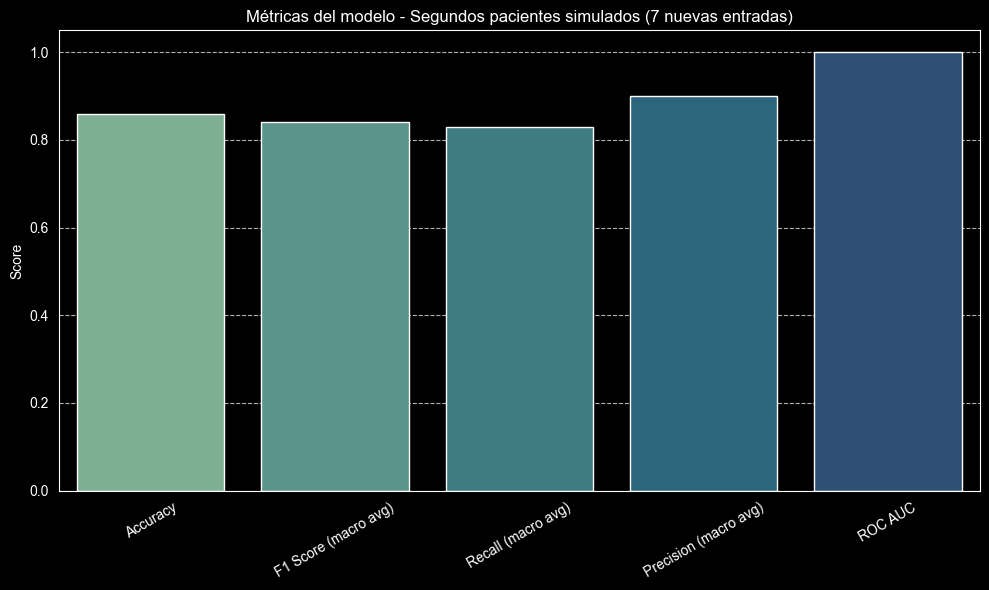

In [102]:
# Métricas detalladas del reporte
metrics = {
    'Accuracy': 0.86,
    'F1 Score (macro avg)': 0.84,
    'Recall (macro avg)': 0.83,
    'Precision (macro avg)': 0.90,
    'ROC AUC': 1.00
}

# Convertir a listas para graficar
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10,6))
sns.barplot(x=names, y=values, palette="crest")
plt.ylim(0,1.05)
plt.title("Métricas del modelo - Segundos pacientes simulados (7 nuevas entradas)")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 4- Comparación de desempeño

## 4.1- Desempeño con dataset

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\2119073811.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette="mako")


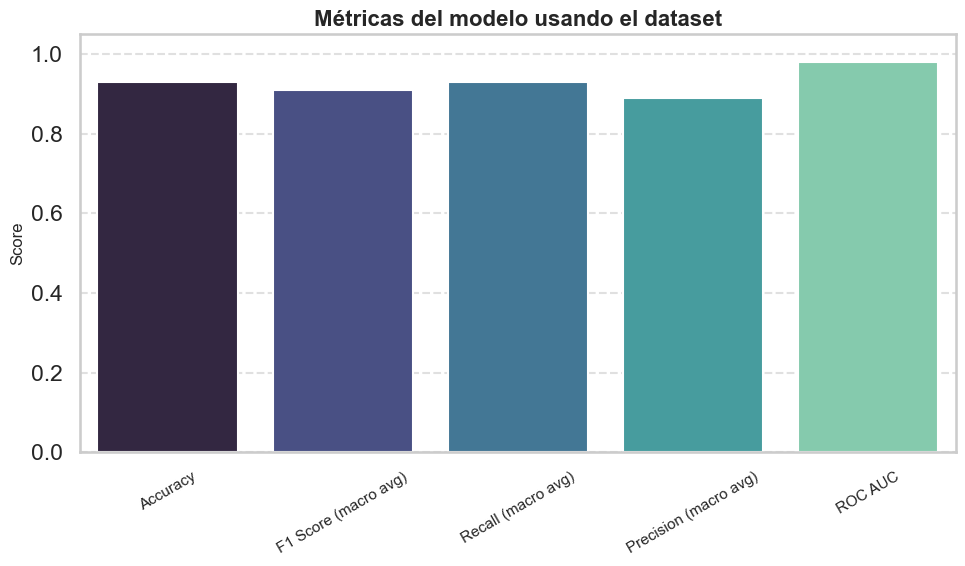

In [111]:
train_metrics = {
    'Accuracy': 0.93,
    'F1 Score (macro avg)': 0.91,
    'Recall (macro avg)': 0.93,
    'Precision (macro avg)': 0.89,
    'ROC AUC': 0.98
}
names = list(train_metrics.keys())
values = list(train_metrics.values())

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10,6))
sns.barplot(x=names, y=values, palette="mako")


plt.ylim(0, 1.05)
plt.title("Métricas del modelo usando el dataset", fontsize=16, weight="bold")
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()


## 4.2- Desempeño con nuevas entradas (primer conjunto)

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\2859691597.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette="mako")


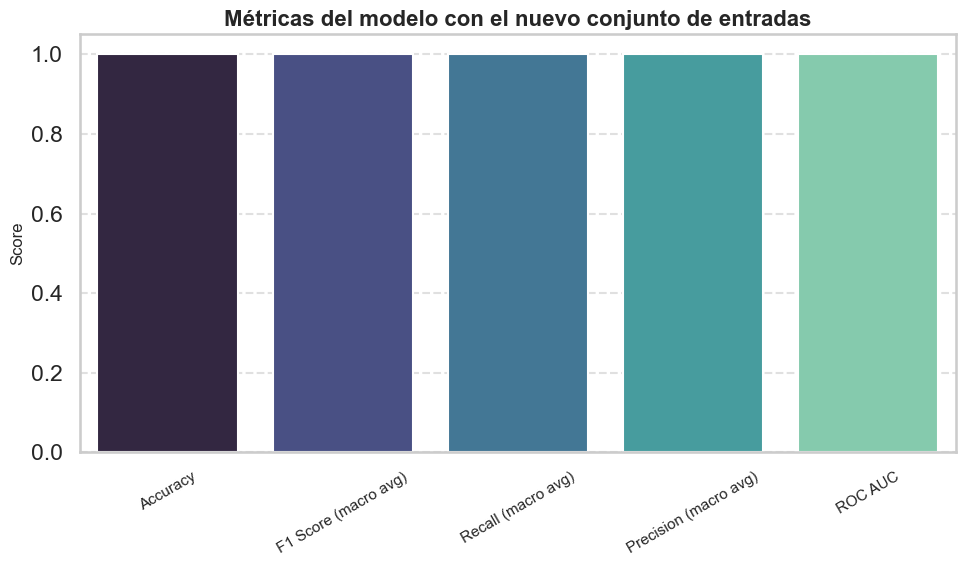

In [108]:
Xnew_metrics = {
    'Accuracy': 1.00,
    'F1 Score (macro avg)': 1.00,
    'Recall (macro avg)': 1.00,
    'Precision (macro avg)': 1.00,
    'ROC AUC': 1.00
}
names = list(Xnew_metrics.keys())
values = list(Xnew_metrics.values())

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10,6))
sns.barplot(x=names, y=values, palette="mako")


plt.ylim(0, 1.05)
plt.title("Métricas del modelo con el nuevo conjunto de entradas", fontsize=16, weight="bold")
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()


## 4.3- Desempeño con nuevas entradas (segundo conjunto)

C:\Users\Marco\AppData\Local\Temp\ipykernel_37028\411602804.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette="mako")


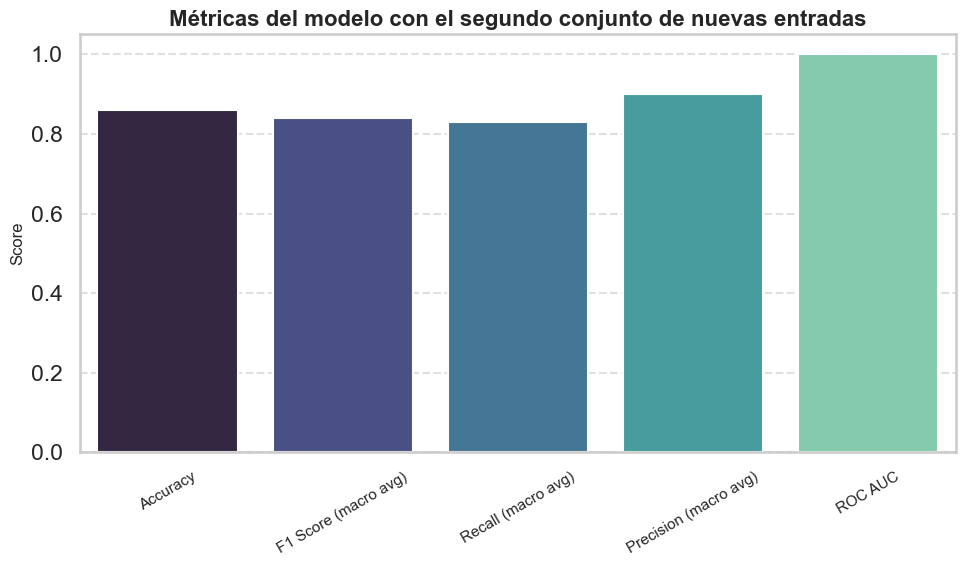

In [110]:
Xnew_metrics2 = {
    'Accuracy': 0.86,
    'F1 Score (macro avg)': 0.84,
    'Recall (macro avg)': 0.83,
    'Precision (macro avg)': 0.90,
    'ROC AUC': 1.00
}
names = list(Xnew_metrics2.keys())
values = list(Xnew_metrics2.values())

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10,6))
sns.barplot(x=names, y=values, palette="mako")


plt.ylim(0, 1.05)
plt.title("Métricas del modelo con el segundo conjunto de nuevas entradas", fontsize=16, weight="bold")
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()